### Why Seaborn?

- provides a layer of abstraction hence simpler to use
- better aesthetics
- more graphs included
### Seaborn Roadmap

Types of Functions

- Figure Level
- Axis Level

Main Classification

- Relational Plot
- Distribution Plot
- Categorical Plot
- Regression Plot
- Matrix Plot
- Multiplots

https://seaborn.pydata.org/api.html

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
sns.get_dataset_names

<function seaborn.utils.get_dataset_names()>

In [10]:
df=sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [12]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


### 1. Relational Plot

- to see the statistical relation between 2 or more variables.
- Bivariate Analysis

Plots under this section

- scatterplot
- lineplot
### 2. Distribution Plots

- used for univariate analysis
- used to find out the distribution
- Range of the observation
- Central Tendency
- is the data bimodal?
- Are there outliers?

Plots under distribution plot

- histplot
- kdeplot
- rugplot

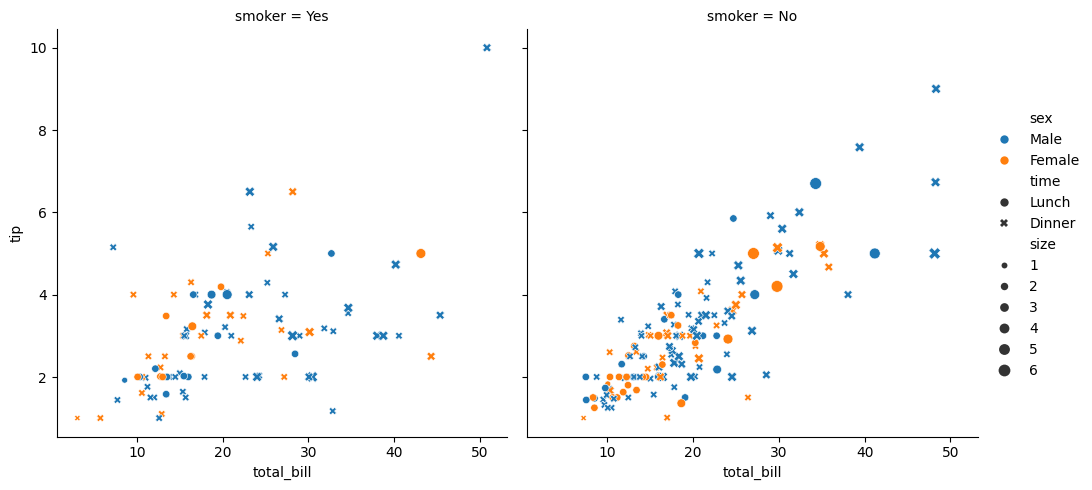

In [13]:
sns.relplot(data=df,x='total_bill',y='tip',hue='sex',col='smoker',size='size',style='time') # kind='line' for line plot and by default it takes scatter plot
plt.show()

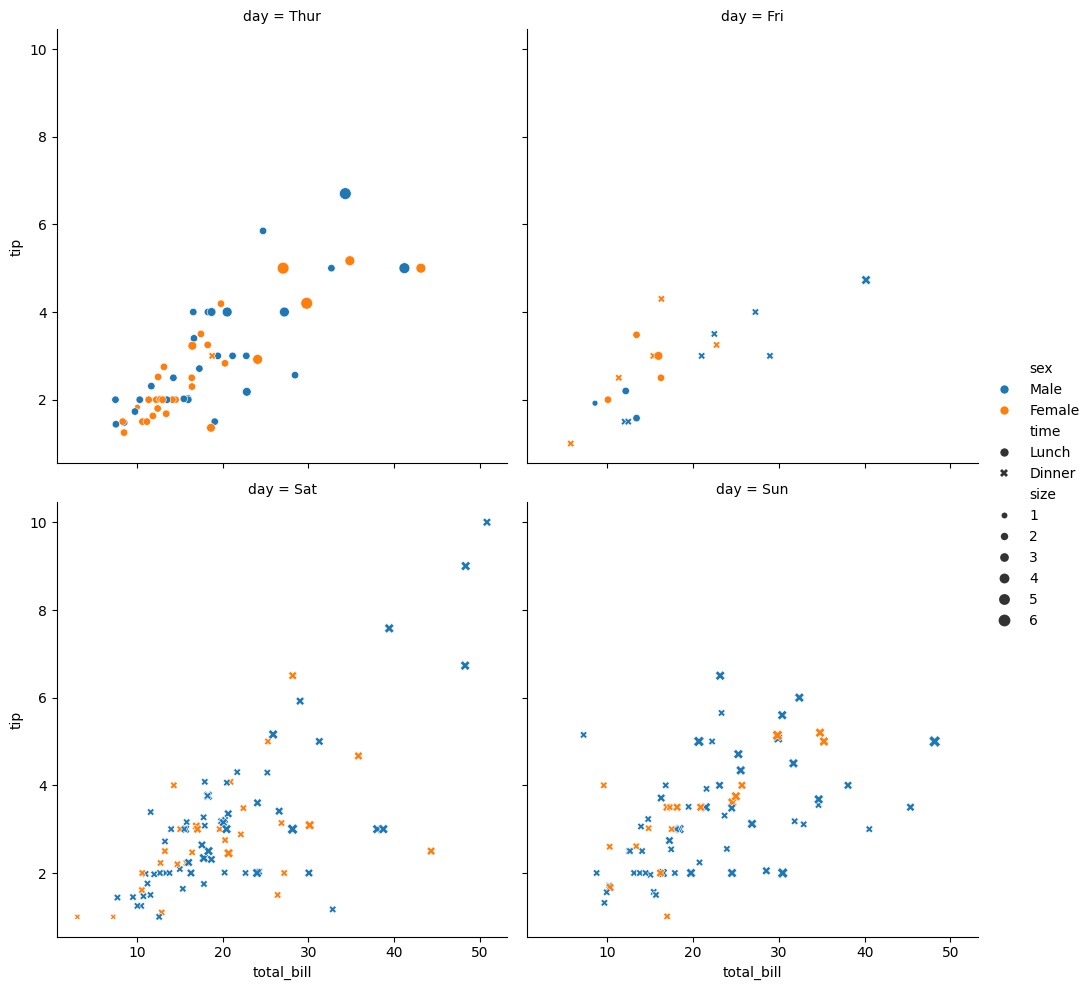

In [14]:
sns.relplot(data=df,x='total_bill',y='tip',hue='sex',col='day',size='size',style='time',col_wrap=2) # height and aspect(width) to set the figure size
plt.show()

In [15]:
df.groupby('day')['size'].sum()

C:\Users\DELL\AppData\Local\Temp\ipykernel_2796\2715754029.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('day')['size'].sum()


day
Thur    152
Fri      40
Sat     219
Sun     216
Name: size, dtype: int64

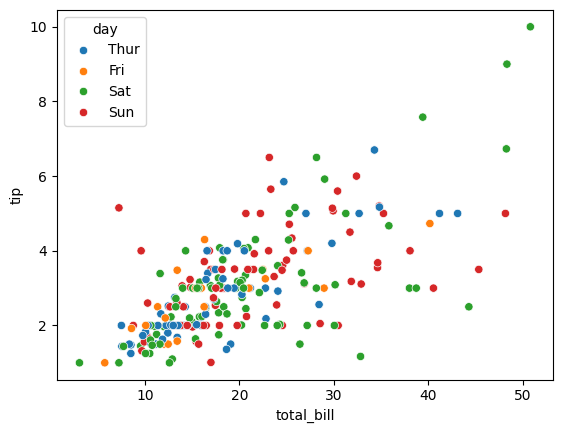

In [16]:
sns.scatterplot(data=df,x='total_bill',y='tip',hue='day')
plt.show()

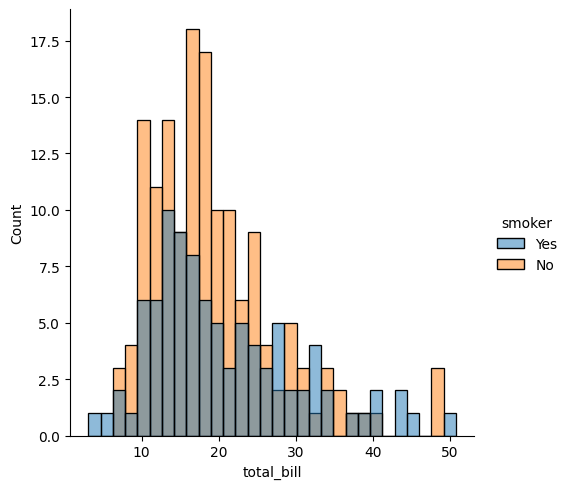

In [17]:
sns.displot(data=df,x='total_bill',hue='smoker',bins=30)
plt.show()

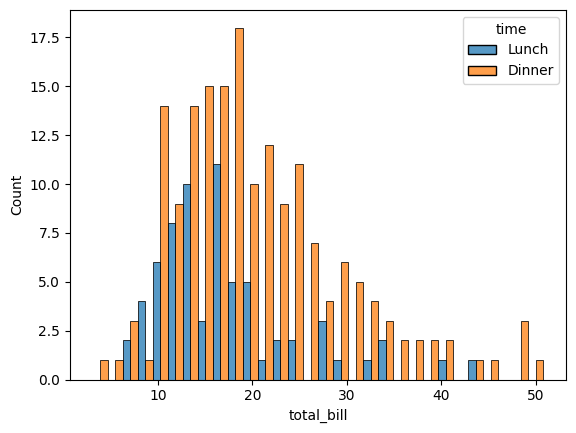

In [18]:
sns.histplot(data=df,x='total_bill',hue='time',bins=30,multiple='dodge') # element='step' for step plot, multiple='stack' for stacked plot, multiple='dodge' for side by side plot
plt.show()

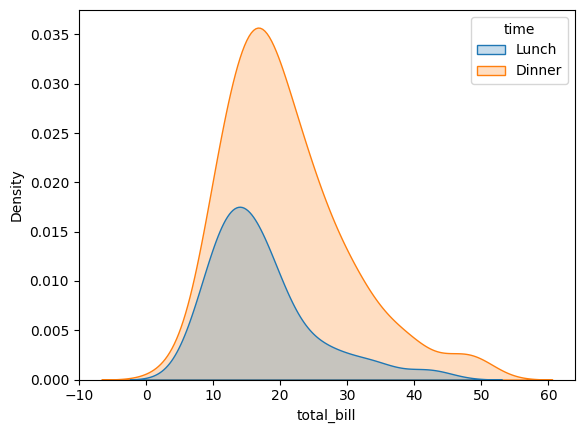

In [19]:
sns.kdeplot(data=df,x='total_bill',hue='time',fill=True)
plt.show()

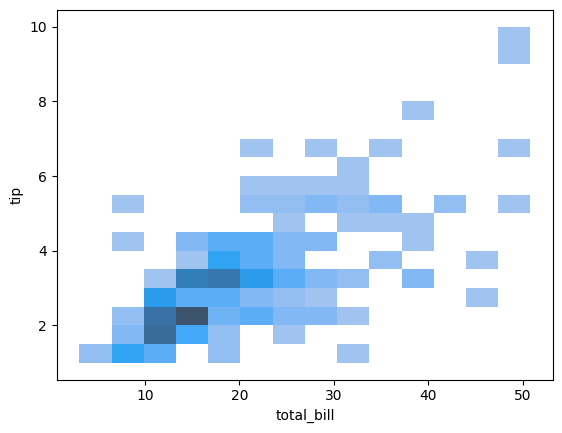

In [20]:
sns.histplot(data=df,x='total_bill',y='tip')
plt.show()

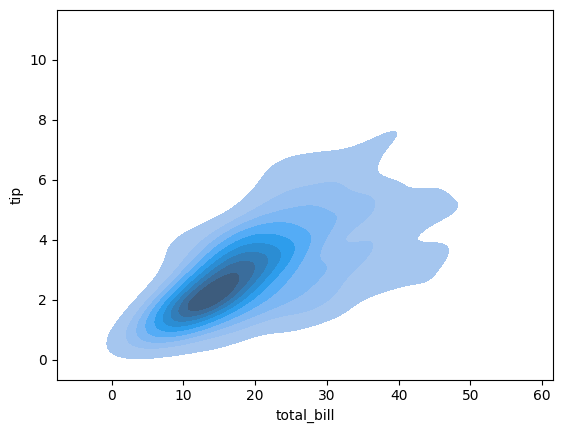

In [21]:
sns.kdeplot(data=df,x='total_bill',y='tip',fill=True)
plt.show()

In [22]:
m=df.pivot_table(index='day',columns='time',values='size',aggfunc='sum')
m

C:\Users\DELL\AppData\Local\Temp\ipykernel_2796\4094328377.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  m=df.pivot_table(index='day',columns='time',values='size',aggfunc='sum')


time,Lunch,Dinner
day,,
Thur,150,2
Fri,14,26
Sat,0,219
Sun,0,216


<Axes: xlabel='time', ylabel='day'>

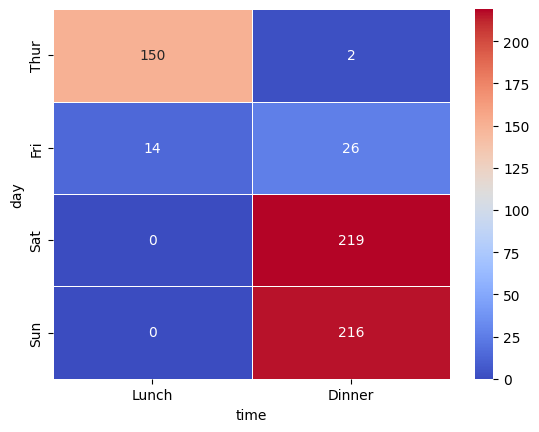

In [23]:
sns.heatmap(data=m,annot=True,linewidths=0.5,cmap='coolwarm',fmt='d')
# plt.savefig('heatmap.png',dpi=300,bbox_inches='tight')